In [557]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = 35
pd.options.display.max_columns = 35

df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# EDA

### Dataset Summary

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

### Feature dimensions

In [559]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int

### Checking for missing values

In [560]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

##### Based on the statistics above, there are no missing values in the dataset

### Fraud Ratio

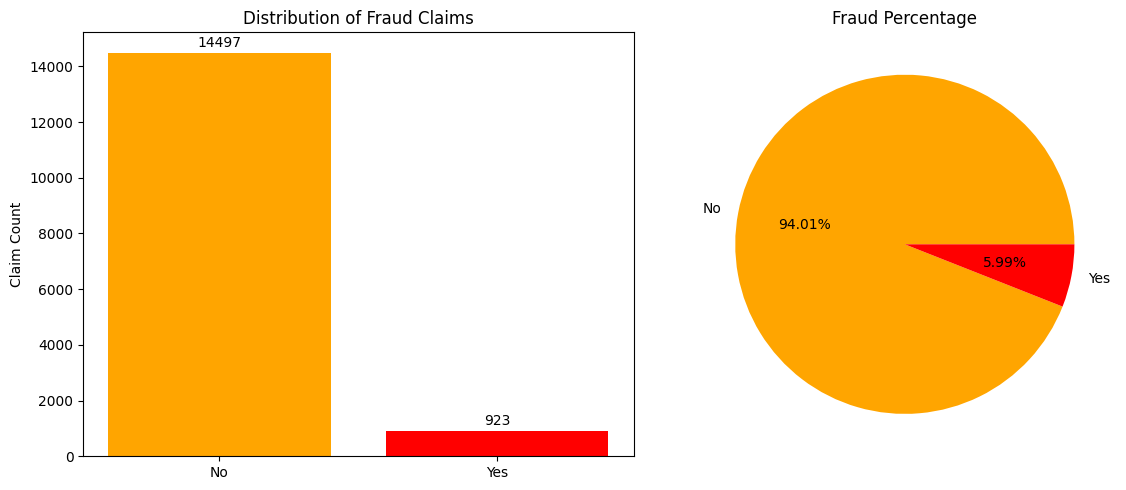

In [561]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fraud_counts = df["FraudFound"].value_counts()
ax[0].bar(fraud_counts.index, fraud_counts.values, color=["orange", "red"])
ax[0].set_ylabel("Claim Count")
ax[0].set_title("Distribution of Fraud Claims")

# Annotate the bar heights with their counts
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 100), ha='center', va='bottom', fontsize=10, color='black')

# Plot the pie chart for the percentage of fraud and no fraud
fraud_percentage = df["FraudFound"].value_counts(normalize=True)
ax[1].pie(fraud_percentage, labels=fraud_percentage.index, autopct='%.2f%%', colors=["orange", "red"])
ax[1].set_title("Fraud Percentage")

plt.tight_layout()
plt.show()


In [562]:
ratio_of_fraud_vs_nonfraud = len(df[df['FraudFound'] == 'Yes']) / len(df[df['FraudFound'] == 'No'])
ratio_of_fraud_vs_nonfraud

0.06366834517486376

The ratio of fraud vs non-fraud transactions is 0.06366834517486376.

### Check duplicate rows

In [563]:
df.duplicated().sum()

0

##### There are no duplcated rows in the dataset

In [564]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Distribution Plots

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PolicyNumber'}>],
       [<Axes: title={'center': 'RepNumber'}>,
        <Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

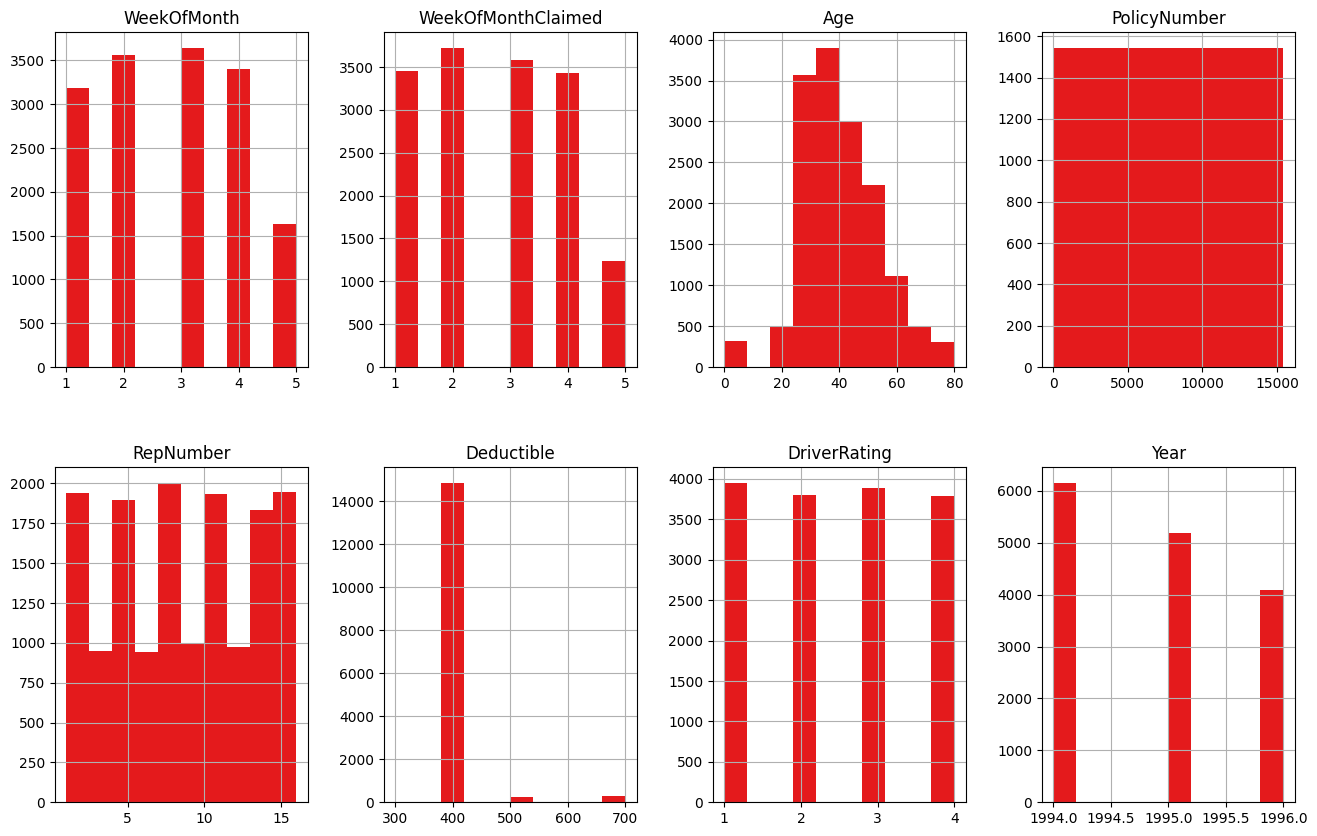

In [565]:
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
df.hist(ax = axis)

##### Converting Yes and No values of "PoliceReportFiled", "WitnessPresent" and "FraudFound" to 1 and 0 respectively

In [566]:
df = df.replace('No', 0)
df = df.replace('Yes', 1)


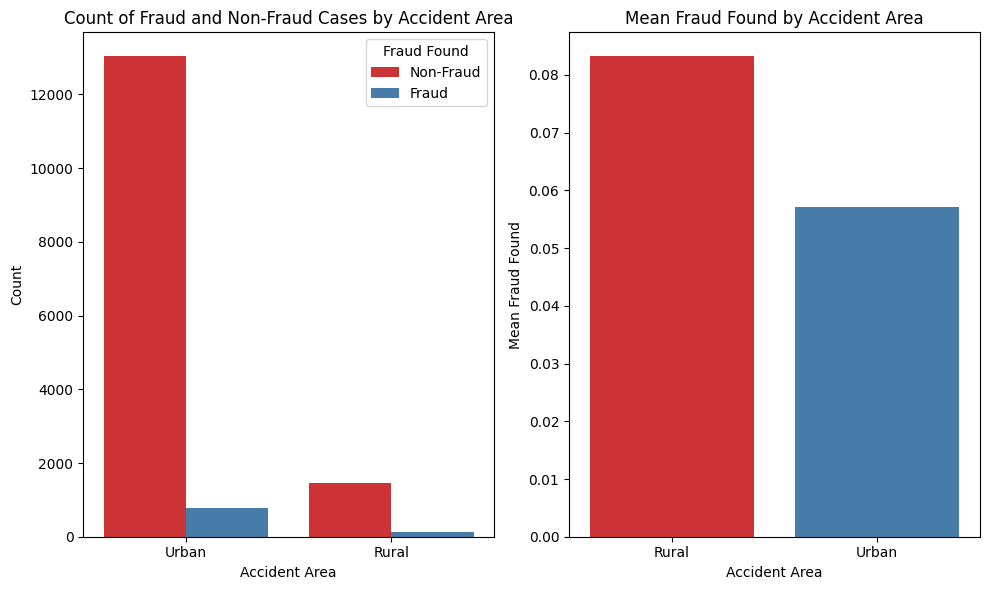

In [567]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))


sns.countplot(x='AccidentArea', hue='FraudFound', data=df, ax=ax[0])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Accident Area')
ax[0].set_xlabel('Accident Area')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])


area_fraud = df.groupby('AccidentArea')['FraudFound'].mean()
sns.barplot(x=area_fraud.index, y=area_fraud.values, ax=ax[1])
ax[1].set_title('Mean Fraud Found by Accident Area')
ax[1].set_xlabel('Accident Area')
ax[1].set_ylabel('Mean Fraud Found')



plt.tight_layout()



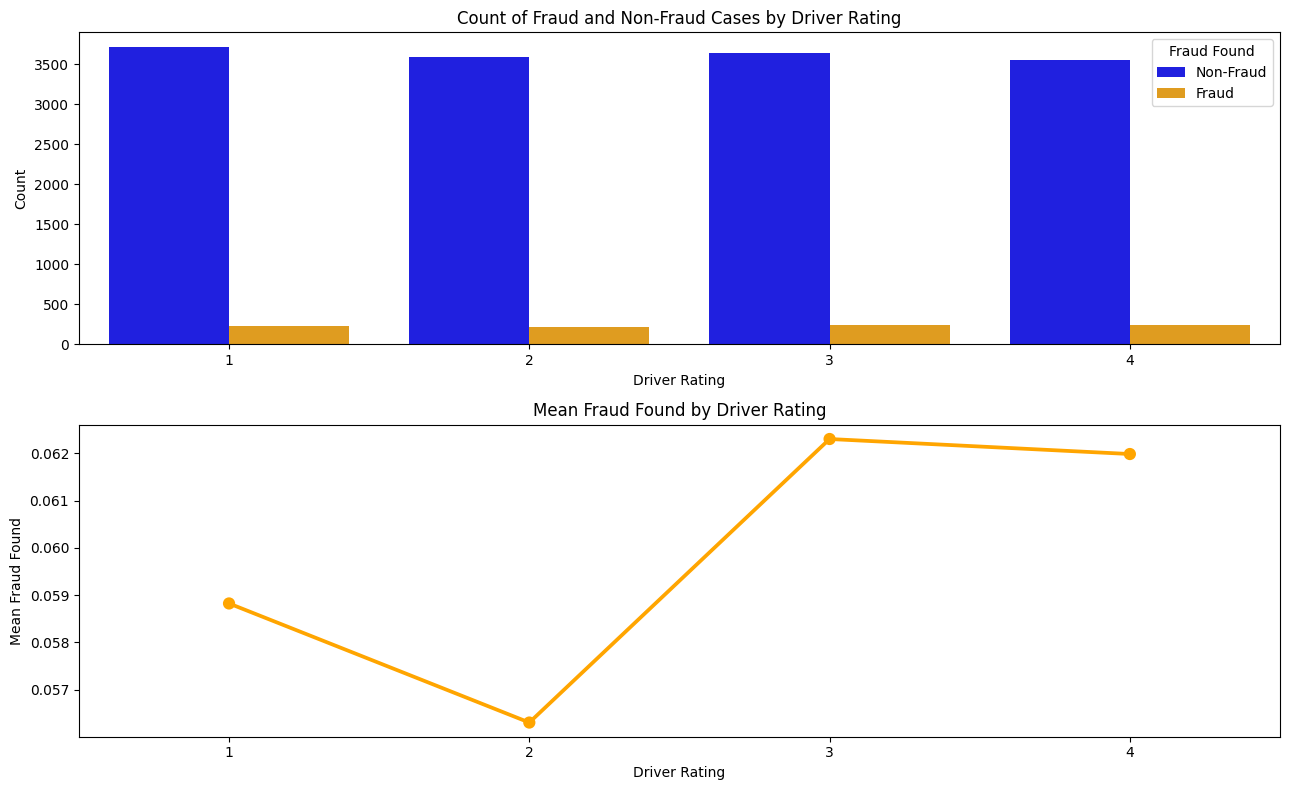

In [568]:
fig, ax = plt.subplots(2, 1, figsize=(13, 8))

sns.countplot(x='DriverRating', hue='FraudFound', data=df, ax=ax[0], palette=["blue","orange"])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Driver Rating')
ax[0].set_xlabel('Driver Rating')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])

rating_fraud = df.groupby('DriverRating')['FraudFound'].mean()
sns.pointplot(x=rating_fraud.index, y=rating_fraud.values, ax=ax[1],color="orange")
ax[1].set_title('Mean Fraud Found by Driver Rating')
ax[1].set_xlabel('Driver Rating')
ax[1].set_ylabel('Mean Fraud Found')

plt.tight_layout()

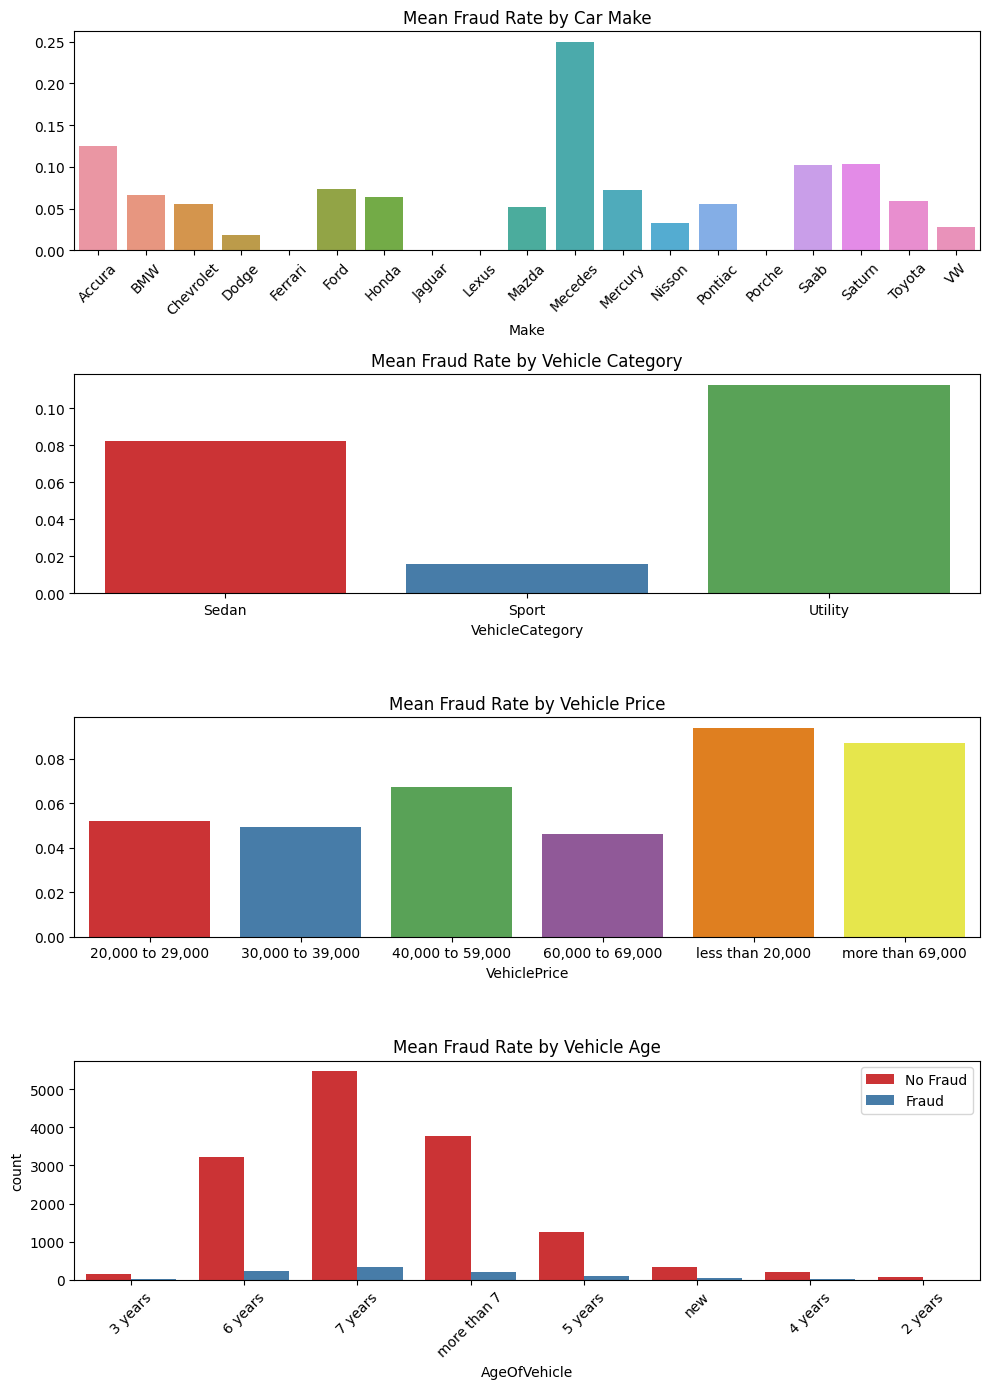

In [587]:
make_fraud = df.groupby('Make')['FraudFound'].mean()
category_fraud = df.groupby('VehicleCategory')['FraudFound'].mean()
price_fraud = df.groupby('VehiclePrice')['FraudFound'].mean()
vehAge_fraud = df.groupby('AgeOfVehicle')['FraudFound'].mean()

fig, ax = plt.subplots(4, 1, figsize=(10,14))

sns.barplot(x=make_fraud.index, y=make_fraud.values, ax=ax[0])
sns.barplot(x=category_fraud.index, y=category_fraud.values, ax=ax[1])
sns.barplot(x=price_fraud.index, y=price_fraud.values, ax=ax[2])
sns.countplot(x = 'AgeOfVehicle', hue = "FraudFound", data = df)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)


ax[0].set_title('Mean Fraud Rate by Car Make')
ax[1].set_title('Mean Fraud Rate by Vehicle Category')
ax[2].set_title('Mean Fraud Rate by Vehicle Price')
ax[3].set_title('Mean Fraud Rate by Vehicle Age')
ax[3].legend(['No Fraud','Fraud'], loc ='upper right')

plt.tight_layout()

<Figure size 600x600 with 0 Axes>

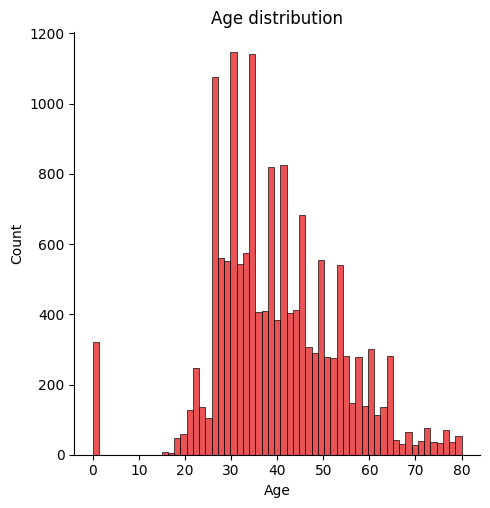

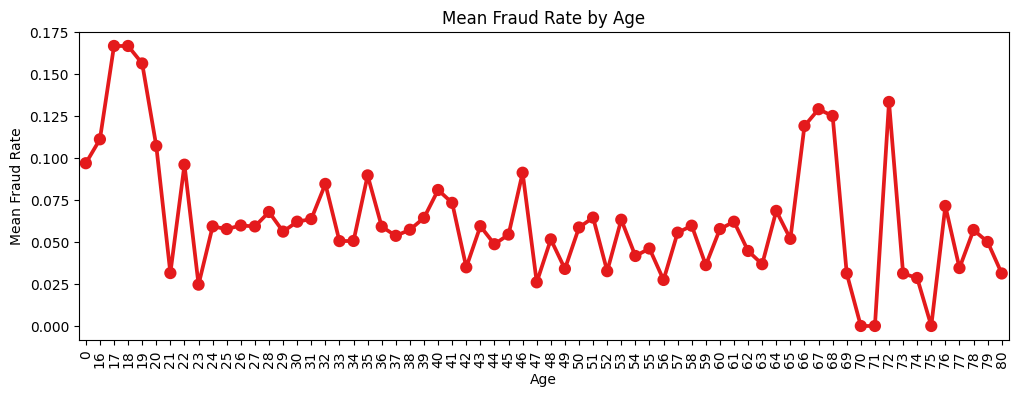

In [570]:

plt.figure(figsize=(6,6))
sns.displot(df['Age'])
plt.title('Age distribution')
plt.show()

age_fraud = df.groupby('Age')['FraudFound'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.pointplot(data=age_fraud, x='Age', y='FraudFound')
plt.title('Mean Fraud Rate by Age')

plt.xlabel('Age')
plt.ylabel('Mean Fraud Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()


### idt age supposed to have 0, 0 means the driver is 16-17 i think? 

Jeff: The 0 could be a placeholder for missing data or the person is underage lol. should we remove/scale/impute it?

In [571]:
df[df["Age"] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",14,12,400,3,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",29,9,400,1,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,All Perils,1
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",32,6,400,1,more than 30,more than 30,1,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",59,15,400,4,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Liability,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15244,7,400,3,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Liability,0
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Liability,0
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Collision,0
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,"more than 69,000",15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,1 year,1 vehicle,1996,All Perils,0


### Global Data Preprocessing

### Training and Test Split

### Local Data Preprocessing

### Feature Engineering